 # ClusterAI - 2020
## Proyecto Integrador - Ingeniería Industrial - UTN FRBA
### Pre Processing y Machine Learning - Obras Públicas
#### Grupo_08 :
- Alan Barbera
- Ailén Kot
- Micaela Tokashiki

In [2]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Una vez que descargamos el dataset procedemos a leer los 3 excels generados
obras_meses = pd.read_excel('obras_en_meses.xlsx')
obras_años = pd.read_excel('obras_publicas.xlsx')
obras_trim = pd.read_excel('obras_en_trimestres.xlsx')

## Análisis en meses

Asignaremos como valores NaN a las obras que se encuentren en ejecución o en licitación. De esta forma será más fácil eliminarlas luego. Nos quedamos únicamente con aquellas que hayan sido finalizadas y tengamos el dato del plazo en meses de duración de la obra.

In [4]:
obras_meses['etapa'].replace('En ejecución',np.nan,inplace=True)
obras_meses['etapa'].replace('En licitación',np.nan,inplace=True)

In [5]:
obras_meses.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras_meses)[0]
print(f'Filas:{filas}')

Filas:883


# Objetivo del Proyecto:
Predicción en función de la comuna, el tipo de obra a realizar y el monto del contrato, el tiempo de realización de la misma

## TARGET

In [6]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y = obras_meses.iloc[:,3]
y

0      29
1      16
2      22
3      28
4      12
       ..
929     2
930     1
931     1
932     1
933     1
Name: plazo_meses, Length: 883, dtype: int64

## FEATURES

In [7]:
# El tipo de obra viene dada en formato string, utilizaremos dummies para transformarlas

tipo_obra = pd.get_dummies(obras_meses.tipo)
obras_meses = obras_meses.join(tipo_obra)
obras_meses

,Unnamed: 0,etapa,tipo,plazo_meses,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,29,67065.700,12,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,16,9950.017,12,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,22,36942.632,1,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,28,26938.294,1,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,12,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,2,2325.368,8,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,1,1984.627,8,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,1,6557.067,9,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,1,22279.428,15,0,0,1,0,0,0,0


In [8]:
# Guardamos en x todas las features excepto el plazo en meses.

x = obras_meses.iloc[:,4:]
x

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


In [9]:
obras_meses['plazo_meses'].value_counts()

2     91
3     91
1     87
4     71
6     62
5     53
7     50
12    39
10    39
8     28
9     26
18    24
16    22
17    21
13    20
15    20
11    18
14    16
20    14
19    13
21    12
23     7
27     7
26     6
24     5
28     5
29     5
22     5
30     3
31     3
37     3
33     2
42     2
32     2
55     1
52     1
46     1
45     1
57     1
40     1
38     1
35     1
34     1
25     1
86     1
Name: plazo_meses, dtype: int64

In [10]:
y.shape

(883,)

In [11]:
x.shape

(883, 9)

## PRE PROCESAMIENTO

In [12]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression

In [13]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.7, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (264, 9)
Se corresponde con el "Y" de entrenamiento (264,)


In [14]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(xtrain)

In [15]:
xtrain_scaled = scaler.transform (xtrain)
xtest_scaled = scaler.transform (xtest)

In [16]:
xtrain_scaled.shape

(264, 9)

## ML

Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.


### Support Vector Classifier

In [17]:
# Definimos el clasificador

svc = SVC(probability=True, class_weight='balanced')

param_svc={'kernel':('linear','rbf'),
           'C':[0.001, 0.1, 1, 5, 10, 100],
           'gamma':[0.1, 1, 5, 10]}

gs_svc=GridSearchCV(svc, param_grid=param_svc, refit=True,cv=5)
gs_svc.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.001, 0.1, 1, 5, 10, 100],
                         'gamma': [0.1, 1, 5, 10],
                         'kernel': ('linear', 'rbf')})

In [18]:
print ('Los mejores parámetros son: ',  gs_svc.best_params_)
print ('El score obtenido fue: ', gs_svc.best_score_)

Los mejores parámetros son:  {'C': 100, 'gamma': 5, 'kernel': 'rbf'}
El score obtenido fue:  0.11357039187227866


In [19]:
ypred_svc=gs_svc.predict(xtest_scaled)
score_svc=accuracy_score(ytest,ypred_svc)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_svc)))

El accuracy obtenido fue de 0.09 


In [20]:
# Vamos a guardar los resultados y comparar al final

rdos = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [21]:
rdos = rdos.append({'Clasificador':'SVC en meses',
                   'Accuracy': score_svc}, ignore_index=True)

### KNN Classifier

In [22]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100]})

In [23]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 5}
El score obtenido fue:  0.1741654571843251
El accuracy obtenido fue de 0.13 


In [24]:
rdos = rdos.append({'Clasificador':'KNN en meses',
                    'Accuracy': score_knn}, ignore_index=True)

In [25]:
# Vamos a ver cómo varía el accuracy en función de los distintos K

iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [26]:
for r in range(0,iteraciones_knn):
   
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scaled,ytrain)
    ypred_knn = neigh.predict(xtest_scaled)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

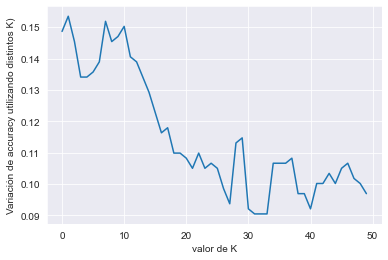

In [28]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
sns.set_style('darkgrid')
plt.show()

Como vimos del gráfico anterior, a mayor K, el accuracy disminuye. Con lo cual, conservamos el obtenido con cross validation previamente

### Random Forest Classifier

In [29]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [30]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 15}
El score obtenido fue:  0.17808417997097242
El accuracy obtenido fue de 0.14 


In [31]:
rdos = rdos.append({'Clasificador':'Random Forest en meses',
                   'Accuracy': score_rfr}, ignore_index=True)

In [32]:
rdos

,Clasificador,Accuracy
0,SVC en meses,0.090468
1,KNN en meses,0.134087
2,Random Forest en meses,0.140549


### Logistic Regression 

In [33]:
lr = LogisticRegression()

param_lr = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5)
gs_lr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [34]:
print ('Los mejores parámetros son: ', gs_lr.best_params_)
print ('El score obtenido fue: ', gs_lr.best_score_)
ypred_lr=gs_lr.predict(xtest_scaled)
score_lr=accuracy_score(ytest,ypred_lr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_lr)))

Los mejores parámetros son:  {'C': 150}
El score obtenido fue:  0.17060957910014513
El accuracy obtenido fue de 0.11 


In [35]:
rdos = rdos.append({'Clasificador':'LR en meses',
                   'Accuracy': score_lr}, ignore_index=True)

In [36]:
rdos

,Clasificador,Accuracy
0,SVC en meses,0.090468
1,KNN en meses,0.134087
2,Random Forest en meses,0.140549
3,LR en meses,0.108239


## Resultados / Visualización

In [37]:
from sklearn.metrics import plot_confusion_matrix

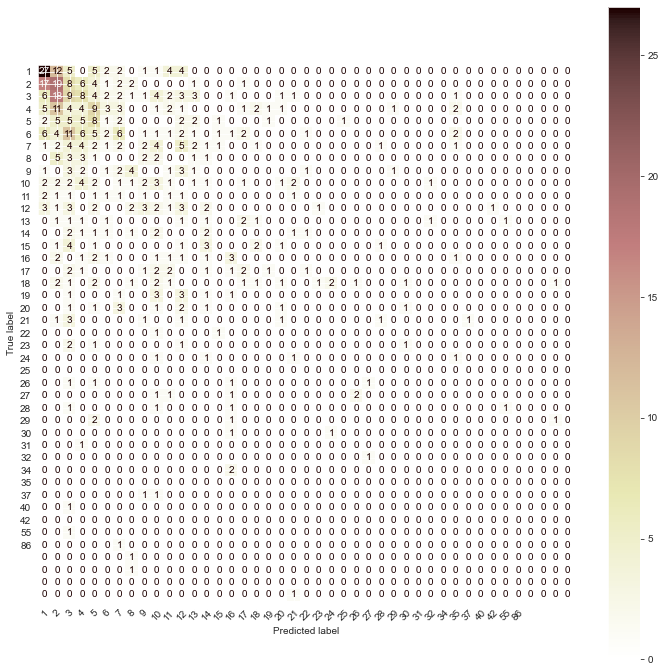

In [38]:
# Visualizamos la matriz de confusión para el mejor accuracy score (en este caso random forest)

fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(gs_rfr, xtest_scaled, ytest,
                            cmap=plt.cm.pink_r,
                            xticks_rotation=45, ax=ax)


In [39]:
print(classification_report(ytest, ypred_rfr))

              precision    recall  f1-score   support

           1       0.38      0.43      0.40        63
           2       0.22      0.31      0.26        61
           3       0.11      0.13      0.12        67
           4       0.09      0.08      0.08        51
           5       0.15      0.23      0.18        35
           6       0.12      0.04      0.06        53
           7       0.07      0.06      0.06        34
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        20
          10       0.09      0.11      0.10        27
          11       0.06      0.09      0.07        11
          12       0.09      0.12      0.10        24
          13       0.00      0.00      0.00        11
          14       0.12      0.17      0.14        12
          15       0.00      0.00      0.00        14
          16       0.21      0.21      0.21        14
          17       0.20      0.14      0.17        14
          18       0.14    

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusiones / Observaciones

Por cómo definimos este modelo, estamos buscando que clasifique entre +30 clases distintas, de las cuales en algunos casos solo tiene 1 sample para aprender, esto provoca que posea un accuracy muy bajo. De aquellas muestras con más samples podemos ver que en la matriz de confusión poseen el valor de true positives más elevado.

## Análisis en años

In [40]:
obras_años['etapa'].replace('En ejecución',np.nan,inplace=True)
obras_años['etapa'].replace('En licitación',np.nan,inplace=True)

In [41]:
obras_años.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras_años)[0]
print(f'Filas:{filas}')

Filas:883


## Target

In [42]:
target = obras_años['plazo_años'].unique()
print("\n", obras_años['plazo_años'].unique())


 ['De 2 a 3 años' 'De 1 a 2 años' 'Menos de 1 año' 'Más de 3 años']


In [43]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y_años = obras_años.iloc[:,3]
y_años

0       De 2 a 3 años
1       De 1 a 2 años
2       De 1 a 2 años
3       De 2 a 3 años
4      Menos de 1 año
            ...      
929    Menos de 1 año
930    Menos de 1 año
931    Menos de 1 año
932    Menos de 1 año
933    Menos de 1 año
Name: plazo_años, Length: 883, dtype: object

In [44]:
# Al ser una variable categórica la vamos a transformar

le_años = preprocessing.LabelEncoder()
y_años = le_años.fit_transform(y_años)
obras_años['Encoded'] = y_años

In [45]:
tipo_obra = pd.get_dummies(obras_años.tipo)
obras_años = obras_años.join(tipo_obra)
obras_años

,Unnamed: 0,etapa,tipo,plazo_años,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,De 2 a 3 años,67065.700,12,1,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,De 1 a 2 años,9950.017,12,0,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,De 1 a 2 años,36942.632,1,0,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,De 2 a 3 años,26938.294,1,1,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,Menos de 1 año,6990.315,8,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,Menos de 1 año,2325.368,8,2,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,Menos de 1 año,1984.627,8,2,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,Menos de 1 año,6557.067,9,2,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,Menos de 1 año,22279.428,15,2,0,0,1,0,0,0,0


## Features

In [46]:
x_años = obras_años.iloc[:,4:]
x_años

,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,1,0,1,0,0,0,0,0
1,9950.017,12,0,0,0,1,0,0,0,0
2,36942.632,1,0,0,0,1,0,0,0,0
3,26938.294,1,1,0,0,1,0,0,0,0
4,6990.315,8,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
929,2325.368,8,2,0,0,1,0,0,0,0
930,1984.627,8,2,0,0,1,0,0,0,0
931,6557.067,9,2,0,0,1,0,0,0,0
932,22279.428,15,2,0,0,1,0,0,0,0


In [47]:
# Recordamos que Encoded es el dummie generado para nuestro target (sacamos por exclusión)
x_años = x_años.drop(['Encoded'],axis=1)
x_años

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


In [48]:
obras_años['Encoded'].value_counts()

2    655
0    179
1     36
3     13
Name: Encoded, dtype: int64

Al encontrarnos frente a un Imbalanced dataset multi-class classification problem (Clasificación multi clase de un dataset no balanceado), se utilizará la técnica de aumentar las samples de las clases menores, a fin de balancear el dataset.

In [49]:
from sklearn.utils import resample

# Primero separamos las clases

obras_majority1 = obras_años[obras_años.Encoded==2]
obras_majority2 = obras_años[obras_años.Encoded==0]
obras_minority1 = obras_años[obras_años.Encoded==1]
obras_minority2 = obras_años[obras_años.Encoded==3]

# Generamos samples para que las 4 clases tengan el mismo peso

obras_majority2_upsampled = resample(obras_majority2, replace=True, n_samples=200, random_state=8)
obras_minority1_upsampled = resample(obras_minority1, replace=True, n_samples=200, random_state=8)
obras_minority2_upsampled = resample(obras_minority2, replace=True, n_samples=200, random_state=8)

# Combinamos todas las clases y contamos los valores

obras_upsampled = pd.concat([obras_majority1,obras_majority2_upsampled,obras_minority1_upsampled,obras_minority2_upsampled])

obras_upsampled['Encoded'].value_counts()

2    655
3    200
1    200
0    200
Name: Encoded, dtype: int64

In [50]:
obras_upsampled.shape

(1255, 14)

In [51]:
obras_upsampled.tail()

,Unnamed: 0,etapa,tipo,plazo_años,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
179,190,Finalizada,Salud,Más de 3 años,8108.578,4,3,0,0,0,0,1,0,0
566,679,Finalizada,Escuelas,Más de 3 años,4374.885,15,3,0,1,0,0,0,0,0
737,876,Finalizada,Transporte,Más de 3 años,2227000.000,2,3,0,0,0,0,0,1,0
566,679,Finalizada,Escuelas,Más de 3 años,4374.885,15,3,0,1,0,0,0,0,0
391,458,Finalizada,Escuelas,Más de 3 años,26452.092,11,3,0,1,0,0,0,0,0


In [52]:
y_años = obras_upsampled.iloc[:,3]
le_años = preprocessing.LabelEncoder()
y_años = le_años.fit_transform(y_años)
obras_upsampled['Encoded'] = y_años

In [53]:
x_años = obras_upsampled.iloc[:,4:]
x_años = x_años.drop(['Encoded'],axis=1)

In [54]:
y_años.shape

(1255,)

In [55]:
x_años.shape

(1255, 9)

In [56]:
# Separamos el data set en train y test
xtrain_años,xtest_años,ytrain_años,ytest_años=train_test_split(x_años,y_años, test_size=0.7, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain_años.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain_años.shape))

El tamaño del "X" de entrenamiento es: (376, 9)
Se corresponde con el "Y" de entrenamiento (376,)


In [57]:
scaler_años = preprocessing.StandardScaler().fit(xtrain_años)

In [58]:
xtrain_scaled_años = scaler_años.transform (xtrain_años)
xtest_scaled_años = scaler_años.transform (xtest_años)

## ML

Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.

### Support Vector Classifier

In [59]:
# Definimos el clasificador

svc_años = SVC(probability=True, class_weight='balanced')

param_svc_años ={'kernel':('linear','rbf'),
                'C':[0.001, 0.1, 1, 5, 10, 100],
                'gamma':[0.1, 1, 5, 10, 20]}

gs_svc_años=GridSearchCV(svc_años, param_grid=param_svc_años, refit=True,cv=5)
gs_svc_años.fit(xtrain_scaled_años,ytrain_años)


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.001, 0.1, 1, 5, 10, 100],
                         'gamma': [0.1, 1, 5, 10, 20],
                         'kernel': ('linear', 'rbf')})

In [60]:
print ('Los mejores parámetros son: ',  gs_svc_años.best_params_)
print ('El score obtenido fue: ', gs_svc_años.best_score_)

Los mejores parámetros son:  {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
El score obtenido fue:  0.7527719298245614


In [61]:
ypred_svc_años=gs_svc_años.predict(xtest_scaled_años)
score_svc_años=accuracy_score(ytest_años,ypred_svc_años)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_años,ypred_svc_años)))

El accuracy obtenido fue de 0.71 


In [62]:
# Vamos a guardar los resultados y comparar al final

rdos_año = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [63]:
rdos_año = rdos_año.append({'Clasificador':'SVC en años',
                   'Accuracy': score_svc_años}, ignore_index=True)

## KNN Classifier

In [64]:
knn_años = KNeighborsClassifier()

param_knn_años = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn_años = GridSearchCV(knn_años, param_grid=param_knn_años,refit=True, cv=5)
gs_knn_años.fit(xtrain_scaled_años,ytrain_años)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [65]:
print ('Los mejores parámetros son: ', gs_knn_años.best_params_)
print ('El score obtenido fue: ', gs_knn_años.best_score_)
ypred_knn_años = gs_knn_años.predict(xtest_scaled_años)
score_knn_años = accuracy_score(ytest_años,ypred_knn_años)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_años,ypred_knn_años)))

Los mejores parámetros son:  {'n_neighbors': 1}
El score obtenido fue:  0.8087368421052632
El accuracy obtenido fue de 0.80 


In [66]:
rdos_año = rdos_año.append({'Clasificador':'KNN en años',
                    'Accuracy': score_knn_años}, ignore_index=True)

In [67]:
# Vamos a ver cómo varía el accuracy en función de los distintos K

iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [68]:
for r in range(0,iteraciones_knn):
   
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scaled_años,ytrain_años)
    ypred_knn_años = neigh.predict(xtest_scaled_años)
    acc_knn[r] = accuracy_score(ytest_años, ypred_knn_años)

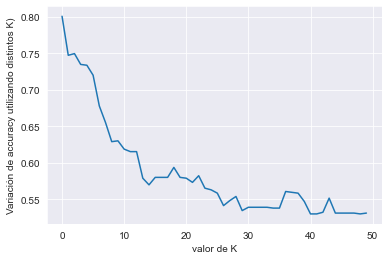

In [69]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
sns.set_style('darkgrid')
plt.show()

## Random Forest Classifier

In [70]:
rfr_años = RandomForestClassifier()

param_rfr_años = {'n_estimators':[15,20,25,50,75,100]}

gs_rfr_años = GridSearchCV(rfr_años, param_grid=param_rfr_años, cv=5)
gs_rfr_años.fit(xtrain_scaled_años,ytrain_años)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [15, 20, 25, 50, 75, 100]})

In [71]:
print ('Los mejores parámetros son: ', gs_rfr_años.best_params_)
print ('El score obtenido fue: ', gs_rfr_años.best_score_)
ypred_rfr_años = gs_rfr_años.predict(xtest_scaled_años)
score_rfr_años = accuracy_score(ytest_años,ypred_rfr_años)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_años,ypred_rfr_años)))

Los mejores parámetros son:  {'n_estimators': 100}
El score obtenido fue:  0.8298947368421052
El accuracy obtenido fue de 0.84 


In [72]:
rdos_año = rdos_año.append({'Clasificador':'Random Forest en años',
                   'Accuracy': score_rfr_años}, ignore_index=True)

## Logistic Regression

In [73]:
lr_años = LogisticRegression()

param_lr_años = {'C': [70, 100, 150, 175]}

gs_lr_años = GridSearchCV(lr_años, param_grid=param_lr_años, cv=5)
gs_lr_años.fit(xtrain_scaled_años,ytrain_años)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [70, 100, 150, 175]})

In [74]:
print ('Los mejores parámetros son: ', gs_lr_años.best_params_)
print ('El score obtenido fue: ', gs_lr_años.best_score_)
ypred_lr_años = gs_lr_años.predict(xtest_scaled_años)
score_lr_años = accuracy_score(ytest_años,ypred_lr_años)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_años,ypred_lr_años)))

Los mejores parámetros son:  {'C': 100}
El score obtenido fue:  0.6409473684210527
El accuracy obtenido fue de 0.64 


In [75]:
rdos_año = rdos_año.append({'Clasificador':'LR en años',
                   'Accuracy': score_lr_años}, ignore_index=True)

In [76]:
rdos_año

,Clasificador,Accuracy
0,SVC en años,0.712173
1,KNN en años,0.800910
2,Random Forest en años,0.844141
3,LR en años,0.635950


## Resultados / Visualización

In [77]:
from sklearn.metrics import confusion_matrix

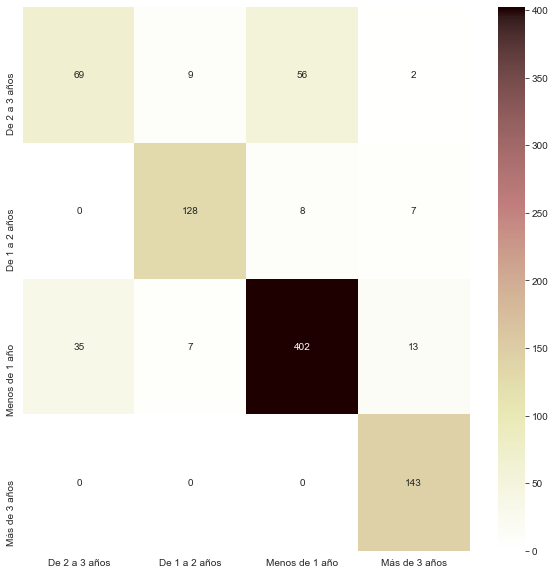

In [78]:
cm = confusion_matrix(ytest_años,ypred_rfr_años)
labels = obras_años['plazo_años'].unique()
df_cm = pd.DataFrame(cm, index=[i for i in labels], columns=[i for i in labels])
plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True, cmap='pink_r',fmt='')
plt.show()

In [79]:
print(classification_report(ytest_años, ypred_rfr_años))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58       136
           1       0.89      0.90      0.89       143
           2       0.86      0.88      0.87       457
           3       0.87      1.00      0.93       143

    accuracy                           0.84       879
   macro avg       0.82      0.82      0.82       879
weighted avg       0.84      0.84      0.84       879



## Conclusiones / Observaciones

En este caso, decidimos realizar bandas de clasificación mucho más amplias (duración 1 año), y el resultado luego de realizar el resample como fue explicado en el Notebook de ML por trimestres, nos arroja valores mucho más altos de accuracy, sin embargo, esta sustancial mejora implica que nuestra clasificación sea imprecisa dado que estamos clasificando con un horizonte temporal muy amplio. 
Ej: Una obra que sea realizada en 2 meses, será clasificada como que llevará "Menos de un año" lo cual es correcto, pero para una información más precisa, la mejor opción es el modelo de ML por trimestres, que en el ejemplo mencionado anteriormente clasificará como "Hasta 3 meses"

## Análisis en trimestres

In [80]:
obras_trim['etapa'].replace('En ejecución',np.nan,inplace=True)
obras_trim['etapa'].replace('En licitación',np.nan,inplace=True)

In [81]:
obras_trim.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras_trim)[0]
print(f'Filas:{filas}')

Filas:883


## Target

In [82]:
target = obras_trim['plazo_trimestres'].unique()
print("\n", obras_trim['plazo_trimestres'].unique())


 ['Más de 2 años' 'Entre 1 y 2 años' 'Entre 9 meses y 1 año'
 'Hasta 3 meses' 'Entre 3 y 6 meses' 'Entre 7 y 9 meses']


In [83]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y_target_trim = obras_trim.iloc[:,3]
y_target_trim

0              Más de 2 años
1           Entre 1 y 2 años
2           Entre 1 y 2 años
3              Más de 2 años
4      Entre 9 meses y 1 año
               ...          
929            Hasta 3 meses
930            Hasta 3 meses
931            Hasta 3 meses
932            Hasta 3 meses
933            Hasta 3 meses
Name: plazo_trimestres, Length: 883, dtype: object

In [84]:
le_trim = preprocessing.LabelEncoder()
y_trim = le_trim.fit_transform(y_target_trim)
obras_trim['Encoded'] = y_trim

In [85]:
obras_trim.head()

,Unnamed: 0,etapa,tipo,plazo_trimestres,monto_miles,comuna,Encoded
0,0,Finalizada,Escuelas,Más de 2 años,67065.700,12,5
1,1,Finalizada,Espacio Público,Entre 1 y 2 años,9950.017,12,0
2,2,Finalizada,Espacio Público,Entre 1 y 2 años,36942.632,1,0
3,3,Finalizada,Espacio Público,Más de 2 años,26938.294,1,5
4,4,Finalizada,Vivienda,Entre 9 meses y 1 año,6990.315,8,3


In [86]:
target = len(obras_trim['Encoded'].unique()) 
print(f'En total hay {target} plazos posibles de obras."\r\n')
print("\n", obras_trim['Encoded'].unique())

En total hay 6 plazos posibles de obras."


 [5 0 3 4 1 2]


In [87]:
y_trim = obras_trim.iloc[:,6]
y_trim

0      5
1      0
2      0
3      5
4      3
      ..
929    4
930    4
931    4
932    4
933    4
Name: Encoded, Length: 883, dtype: int32

## Features

In [88]:
tipo_obra = pd.get_dummies(obras_trim.tipo)
obras_trim = obras_trim.join(tipo_obra)
obras_trim

,Unnamed: 0,etapa,tipo,plazo_trimestres,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,Más de 2 años,67065.700,12,5,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,Entre 1 y 2 años,9950.017,12,0,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,Entre 1 y 2 años,36942.632,1,0,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,Más de 2 años,26938.294,1,5,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,Entre 9 meses y 1 año,6990.315,8,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,Hasta 3 meses,2325.368,8,4,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,Hasta 3 meses,1984.627,8,4,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,Hasta 3 meses,6557.067,9,4,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,Hasta 3 meses,22279.428,15,4,0,0,1,0,0,0,0


In [89]:
x_trim = obras_trim.iloc[:,4:]
x_trim

,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,5,0,1,0,0,0,0,0
1,9950.017,12,0,0,0,1,0,0,0,0
2,36942.632,1,0,0,0,1,0,0,0,0
3,26938.294,1,5,0,0,1,0,0,0,0
4,6990.315,8,3,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
929,2325.368,8,4,0,0,1,0,0,0,0
930,1984.627,8,4,0,0,1,0,0,0,0
931,6557.067,9,4,0,0,1,0,0,0,0
932,22279.428,15,4,0,0,1,0,0,0,0


In [90]:
# Recordamos que Encoded es el dummie generado para nuestro target (sacamos por exclusión)
x_trim = x_trim.drop(['Encoded'],axis=1)
x_trim

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


In [91]:
obras_trim['plazo_trimestres'].value_counts()

Hasta 3 meses            269
Entre 3 y 6 meses        186
Entre 1 y 2 años         179
Entre 7 y 9 meses        104
Entre 9 meses y 1 año     96
Más de 2 años             49
Name: plazo_trimestres, dtype: int64

In [92]:
# Analizaremos primero el dataset sin realizar el resample
# Separamos el data set en train y test

xtrain_trim,xtest_trim,ytrain_trim,ytest_trim=train_test_split(x_trim,y_trim, test_size=0.8, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain_trim.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain_trim.shape))

El tamaño del "X" de entrenamiento es: (176, 9)
Se corresponde con el "Y" de entrenamiento (176,)


In [93]:
from sklearn import preprocessing

scaler_trim = preprocessing.StandardScaler().fit(xtrain_trim)

In [94]:
xtrain_scaled_trim = scaler_trim.transform (xtrain_trim)
xtest_scaled_trim = scaler_trim.transform (xtest_trim)

## ML
Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.

## Support Vector Classifier

In [95]:
# Definimos el clasificador

svc_trim = SVC(probability=True, class_weight='balanced')

param_svc_trim={'kernel':('linear','rbf'),
           'C':[0.1, 1, 5, 10, 100],
           'gamma':[0.1, 1, 5, 10]}

gs_svc_trim = GridSearchCV(svc_trim, param_grid=param_svc_trim, refit=True,cv=5)
gs_svc_trim.fit(xtrain_scaled_trim,ytrain_trim)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 5, 10, 100], 'gamma': [0.1, 1, 5, 10],
                         'kernel': ('linear', 'rbf')})

In [96]:
print ('Los mejores parámetros son: ',  gs_svc_trim.best_params_)
print ('El score obtenido fue: ', gs_svc_trim.best_score_)

Los mejores parámetros son:  {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
El score obtenido fue:  0.3295238095238095


In [97]:
ypred_svc_trim = gs_svc_trim.predict(xtest_scaled_trim)
score_svc_trim = accuracy_score(ytest_trim,ypred_svc_trim)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_trim,ypred_svc_trim)))

El accuracy obtenido fue de 0.32 


In [98]:
# Vamos a guardar los resultados y comparar al final

rdos_trim = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [99]:
rdos_trim = rdos_trim.append({'Clasificador':'SVC en trim, sin resample',
                   'Accuracy': score_svc_trim}, ignore_index=True)

## KNN Classifier

In [100]:
knn_trim = KNeighborsClassifier()

param_knn_trim = {'n_neighbors': [1,5,10,15,20,50,100]}

gs_knn_trim = GridSearchCV(knn_trim, param_grid=param_knn_trim,refit=True, cv=5)
gs_knn_trim.fit(xtrain_scaled_trim,ytrain_trim)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 50, 100]})

In [101]:
print ('Los mejores parámetros son: ', gs_knn_trim.best_params_)
print ('El score obtenido fue: ', gs_knn_trim.best_score_)
ypred_knn_trim = gs_knn_trim.predict(xtest_scaled_trim)
score_knn_trim = accuracy_score(ytest_trim,ypred_knn_trim)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_trim,ypred_knn_trim)))

Los mejores parámetros son:  {'n_neighbors': 1}
El score obtenido fue:  0.36936507936507934
El accuracy obtenido fue de 0.34 


In [102]:
rdos_trim = rdos_trim.append({'Clasificador':'KNN en trim, sin resample',
                    'Accuracy': score_knn_trim}, ignore_index=True)

## Random Forest Classifier

In [103]:
rfr_trim = RandomForestClassifier()

param_rfr_trim = {'n_estimators':[1,10,15,20,25,50,75,100]}

gs_rfr_trim = GridSearchCV(rfr_trim, param_grid=param_rfr_trim, cv=5)
gs_rfr_trim.fit(xtrain_scaled_trim,ytrain_trim)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 10, 15, 20, 25, 50, 75, 100]})

In [104]:
print ('Los mejores parámetros son: ', gs_rfr_trim.best_params_)
print ('El score obtenido fue: ', gs_rfr_trim.best_score_)
ypred_rfr_trim = gs_rfr_trim.predict(xtest_scaled_trim)
score_rfr_trim = accuracy_score(ytest_trim,ypred_rfr_trim)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_trim,ypred_rfr_trim)))

Los mejores parámetros son:  {'n_estimators': 15}
El score obtenido fue:  0.39761904761904765
El accuracy obtenido fue de 0.37 


In [105]:
rdos_trim = rdos_trim.append({'Clasificador':'Random Forest en trim, sin resample',
                   'Accuracy': score_rfr_trim}, ignore_index=True)

## Logistic Regression

In [106]:
lr_trim = LogisticRegression()

param_lr_trim = {'C': [1, 5, 10, 50, 70, 100]}

gs_lr_trim = GridSearchCV(lr_trim, param_grid=param_lr_trim, cv=5)
gs_lr_trim.fit(xtrain_scaled_trim,ytrain_trim)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100]})

In [107]:
print ('Los mejores parámetros son: ', gs_lr_trim.best_params_)
print ('El score obtenido fue: ', gs_lr_trim.best_score_)
ypred_lr_trim = gs_lr_trim.predict(xtest_scaled_trim)
score_lr_trim = accuracy_score(ytest_trim,ypred_lr_trim)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_trim,ypred_lr_trim)))

Los mejores parámetros son:  {'C': 10}
El score obtenido fue:  0.42666666666666664
El accuracy obtenido fue de 0.38 


In [108]:
rdos_trim = rdos_trim.append({'Clasificador':'LR en trim, sin resample',
                   'Accuracy': score_lr_trim}, ignore_index=True)

## Resample dataset en trimestres

In [109]:
obras_trim['plazo_trimestres'].value_counts()

Hasta 3 meses            269
Entre 3 y 6 meses        186
Entre 1 y 2 años         179
Entre 7 y 9 meses        104
Entre 9 meses y 1 año     96
Más de 2 años             49
Name: plazo_trimestres, dtype: int64

In [110]:
obras_trim['Encoded'].value_counts()

4    269
1    186
0    179
2    104
3     96
5     49
Name: Encoded, dtype: int64

In [111]:
from sklearn.utils import resample

# Primero separamos las clases

obras1 = obras_trim[obras_trim.Encoded==4]
obras2 = obras_trim[obras_trim.Encoded==1]
obras3 = obras_trim[obras_trim.Encoded==0]
obras4 = obras_trim[obras_trim.Encoded==2]
obras5 = obras_trim[obras_trim.Encoded==3]
obras6 = obras_trim[obras_trim.Encoded==5]

# Generamos samples para que las 4 clases tengan el mismo peso

obras1_upsampled = resample(obras1, replace=True, n_samples=269, random_state=8)
obras2_upsampled = resample(obras2, replace=True, n_samples=190, random_state=8)
obras3_upsampled = resample(obras3, replace=True, n_samples=190, random_state=8)
obras4_upsampled = resample(obras4, replace=True, n_samples=190, random_state=8)
obras5_upsampled = resample(obras5, replace=True, n_samples=190, random_state=8)
obras6_upsampled = resample(obras6, replace=True, n_samples=190, random_state=8)

# Combinamos todas las clases y contamos los valores

obras_upsampled = pd.concat([obras1_upsampled,obras2_upsampled,obras3_upsampled,obras4_upsampled,obras5_upsampled,obras6_upsampled])

obras_upsampled['Encoded'].value_counts()

4    269
5    190
3    190
2    190
1    190
0    190
Name: Encoded, dtype: int64

In [112]:
y_trim2 = obras_upsampled.iloc[:,3]
le_trim2 = preprocessing.LabelEncoder()
y_trim2 = le_trim2.fit_transform(y_trim2)
obras_upsampled['Encoded'] = y_trim2

In [113]:
x_trim2 = obras_upsampled.iloc[:,4:]
x_trim2 = x_trim2.drop(['Encoded'],axis=1)

In [114]:
# Separamos el data set en train y test
xtrain_trim2,xtest_trim2,ytrain_trim2,ytest_trim2=train_test_split(x_trim2,y_trim2, test_size=0.3, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain_trim2.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain_trim2.shape))

El tamaño del "X" de entrenamiento es: (853, 9)
Se corresponde con el "Y" de entrenamiento (853,)


In [115]:
from sklearn import preprocessing

scaler_trim2 = preprocessing.StandardScaler().fit(xtrain_trim2)

In [116]:
xtrain_scaled_trim2 = scaler_trim2.transform (xtrain_trim2)
xtest_scaled_trim2 = scaler_trim2.transform (xtest_trim2)

## ML
Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.

## Support Vector Classifier

In [117]:
# Definimos el clasificador

svc_trim2 = SVC(probability=True, class_weight='balanced')

param_svc_trim2={'kernel':('linear','rbf'),
           'C':[ 0.1, 1, 5, 10, 50],
           'gamma':[0.1, 1, 5, 10]}

gs_svc_trim2 = GridSearchCV(svc_trim2, param_grid=param_svc_trim2, refit=True,cv=5)
gs_svc_trim2.fit(xtrain_scaled_trim2,ytrain_trim2)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.1, 1, 5, 10, 50], 'gamma': [0.1, 1, 5, 10],
                         'kernel': ('linear', 'rbf')})

In [118]:
print ('Los mejores parámetros son: ',  gs_svc_trim2.best_params_)
print ('El score obtenido fue: ', gs_svc_trim2.best_score_)

Los mejores parámetros son:  {'C': 50, 'gamma': 10, 'kernel': 'rbf'}
El score obtenido fue:  0.5684898520811833


In [119]:
ypred_svc_trim2 = gs_svc_trim2.predict(xtest_scaled_trim2)
score_svc_trim2 = accuracy_score(ytest_trim2,ypred_svc_trim2)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_trim2,ypred_svc_trim2)))

El accuracy obtenido fue de 0.61 


In [120]:
rdos_trim = rdos_trim.append({'Clasificador':'SVC en trim, con resample',
                   'Accuracy': score_svc_trim2}, ignore_index=True)

## KNN Classifier

In [121]:
knn_trim2 = KNeighborsClassifier()

param_knn_trim2 = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn_trim2 = GridSearchCV(knn_trim2, param_grid=param_knn_trim2,refit=True, cv=5)
gs_knn_trim2.fit(xtrain_scaled_trim2,ytrain_trim2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [122]:
print ('Los mejores parámetros son: ', gs_knn_trim2.best_params_)
print ('El score obtenido fue: ', gs_knn_trim2.best_score_)
ypred_knn_trim2 = gs_knn_trim2.predict(xtest_scaled_trim2)
score_knn_trim2 = accuracy_score(ytest_trim2,ypred_knn_trim2)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_trim2,ypred_knn_trim2)))

Los mejores parámetros son:  {'n_neighbors': 1}
El score obtenido fue:  0.7256346749226006
El accuracy obtenido fue de 0.81 


In [123]:
rdos_trim = rdos_trim.append({'Clasificador':'KNN en trim, con resample',
                    'Accuracy': score_knn_trim2}, ignore_index=True)

## Random Forest Classifier

In [124]:
rfr_trim2 = RandomForestClassifier()

param_rfr_trim2 = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr_trim2 = GridSearchCV(rfr_trim2, param_grid=param_rfr_trim2, cv=5)
gs_rfr_trim2.fit(xtrain_scaled_trim2,ytrain_trim2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [125]:
print ('Los mejores parámetros son: ', gs_rfr_trim2.best_params_)
print ('El score obtenido fue: ', gs_rfr_trim2.best_score_)
ypred_rfr_trim2 = gs_rfr_trim2.predict(xtest_scaled_trim2)
score_rfr_trim2 = accuracy_score(ytest_trim2,ypred_rfr_trim2)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_trim2,ypred_rfr_trim2)))

Los mejores parámetros son:  {'n_estimators': 50}
El score obtenido fue:  0.7279944960440317
El accuracy obtenido fue de 0.81 


In [126]:
rdos_trim = rdos_trim.append({'Clasificador':'Random Forest en trim, con resample',
                    'Accuracy': score_rfr_trim2}, ignore_index=True)

## Logistic Regression

In [127]:
lr_trim2 = LogisticRegression()

param_lr_trim2 = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr_trim2 = GridSearchCV(lr_trim2, param_grid=param_lr_trim2, cv=5)
gs_lr_trim2.fit(xtrain_scaled_trim2,ytrain_trim2)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [128]:
print ('Los mejores parámetros son: ', gs_lr_trim2.best_params_)
print ('El score obtenido fue: ', gs_lr_trim2.best_score_)
ypred_lr_trim2 = gs_lr_trim2.predict(xtest_scaled_trim2)
score_lr_trim2 = accuracy_score(ytest_trim2,ypred_lr_trim2)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest_trim2,ypred_lr_trim2)))

Los mejores parámetros son:  {'C': 50}
El score obtenido fue:  0.36338493292053664
El accuracy obtenido fue de 0.39 


In [129]:
rdos_trim = rdos_trim.append({'Clasificador':'LR en trim, con resample',
                   'Accuracy': score_lr_trim2}, ignore_index=True)

In [130]:
rdos_trim

,Clasificador,Accuracy
0,"SVC en trim, sin resample",0.321075
1,"KNN en trim, sin resample",0.340877
2,"Random Forest en trim, sin resample",0.367751
3,"LR en trim, sin resample",0.384724
4,"SVC en trim, con resample",0.609290
5,"KNN en trim, con resample",0.806011
6,"Random Forest en trim, con resample",0.811475
7,"LR en trim, con resample",0.387978


## Resultados / visualización

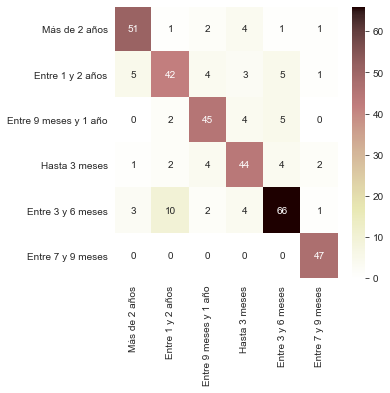

In [131]:
cm_trim = confusion_matrix(ytest_trim2,ypred_knn_trim2)
labels_trim = obras_trim['plazo_trimestres'].unique()

df_cm_trim = pd.DataFrame(cm_trim, index=[i for i in labels_trim], columns=[i for i in labels_trim])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm_trim, annot=True, cmap='pink_r',fmt='')
plt.show()

In [132]:
print(classification_report(ytest_trim2, ypred_knn_trim2))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.74      0.70      0.72        60
           2       0.79      0.80      0.80        56
           3       0.75      0.77      0.76        57
           4       0.81      0.77      0.79        86
           5       0.90      1.00      0.95        47

    accuracy                           0.81       366
   macro avg       0.81      0.82      0.81       366
weighted avg       0.80      0.81      0.80       366



## Conclusiones / Observaciones

Definiendo el modelo en períodos más grandes de tiempo, vemos cómo mejora el resultado del clasificador en comparación a realizarlo por meses. Sin embargo, el accuracy continúa siendo bajo, esto probablemente sea porque el set se encuentra desbalanceado. 
En la segunda parte, cuando se realiza el resample para agregar muestras y que todos posean la misma cantidad dentro del dataset podemos observar cómo mejora el accuracy. Esta mejora se ve atada a un mayor costo computacional ya que el tiempo de entrenamiento y testeo resulta mayor (por el mayor número de muestras)